In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
data = pd.read_csv('classified_data/optrain_classified.csv')

In [14]:
data.head(2)

,address,balance,Days_held,Amount_Received(OP),Amount_Sold(OP),percentage_spent,TDR,Wallet_Age(Days),From_Count,To_Count,Past_participant,duration
0,0x098ddd0d9d0727b6459f2cc565ae6ae35740d39d,0.00125,67,2.939102,0.0,0.0,0.628,133,37,39,False,Over 4 weeks
1,0x60983eec5040a9211f6b1808a1a3e3a2742a4821,0.00956,7,256.190584,356.0,100.0,0.111,317,15,16,True,Less than a week


In [15]:
data['no_transactions'] = data['From_Count'] + data['To_Count']

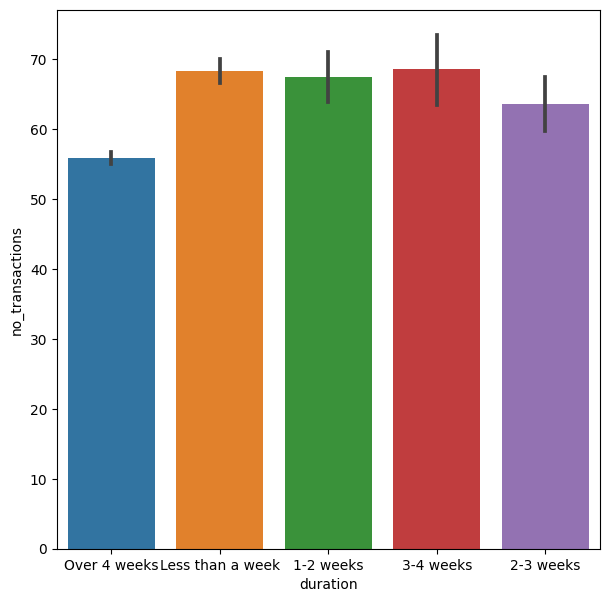

In [16]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, x='duration',y='no_transactions');

In [17]:
data.loc[data['duration']=='Over 4 weeks']['no_transactions'].mean()

55.849908925318765

In [18]:
values = data.loc[data['duration']=='2-3 weeks']['no_transactions'].mean(),data.loc[data['duration']=='3-4 weeks']['no_transactions'].mean(),data.loc[data['duration']=='1-2 weeks']['no_transactions'].mean(),data.loc[data['duration']=='Less than a week']['no_transactions'].mean()

pct_diff_from_56 = [(value - 56) / 56 * 100 for value in values]

avg_pct_diff_from_56 = sum(pct_diff_from_56) / len(pct_diff_from_56)

print(f'{round(avg_pct_diff_from_56,1)} %')

19.5 %


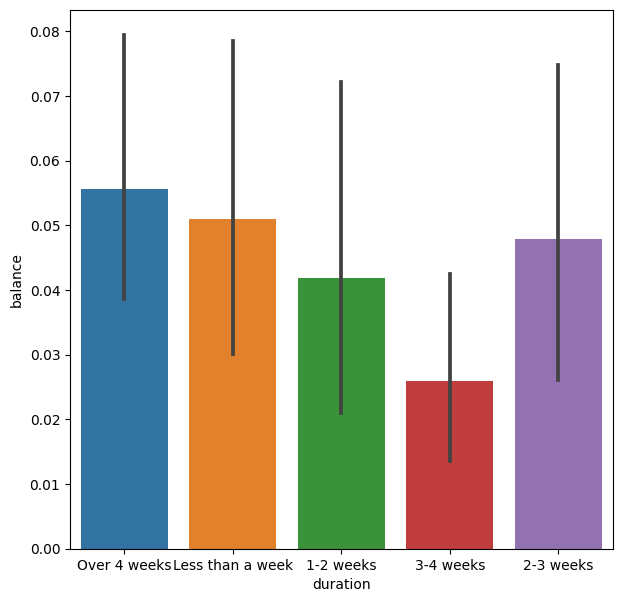

In [19]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, x='duration',y='balance');

In [21]:
data.loc[data['duration']=='Over 4 weeks']['balance'].mean()

0.05560662841530055

In [22]:
data.describe()

,balance,Days_held,Amount_Received(OP),Amount_Sold(OP),percentage_spent,TDR,Wallet_Age(Days),From_Count,To_Count,no_transactions
count,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.00000,7477.000000,7477.000000,7477.000000
mean,0.053441,49.415274,35.786427,40.948371,41.833841,1.658602,238.84673,27.287014,31.674736,58.961749
std,0.697236,26.923101,170.487634,278.377977,48.121321,7.795442,133.63027,15.450442,17.527686,32.141560
min,0.000000,0.000000,2.316676,0.000000,0.000000,0.005000,67.00000,0.000000,1.000000,1.000000
25%,0.000700,23.000000,3.603673,0.000000,0.000000,0.136000,121.00000,16.000000,19.000000,35.000000
50%,0.003300,67.000000,5.122094,0.000000,0.000000,0.569000,189.00000,28.000000,32.000000,60.000000
75%,0.012000,67.000000,11.897814,6.500508,100.000000,1.114000,323.00000,40.000000,47.000000,91.000000
max,45.080900,69.000000,5503.734832,9212.896526,100.000000,100.000000,523.00000,99.000000,95.000000,100.000000


In [23]:
low = round(data.loc[data['duration']=='3-4 weeks']['balance'].mean(),5)

values1 = data.loc[data['duration']=='2-3 weeks']['balance'].mean(),data.loc[data['duration']=='3-4 weeks']['balance'].mean(),data.loc[data['duration']=='1-2 weeks']['balance'].mean(),data.loc[data['duration']=='Less than a week']['balance'].mean()

pct_diff_from_lowest_balance = [(value - low) / low * 100 for value in values1]

pct_diff_from_lowest_balance = sum(pct_diff_from_lowest_balance) / len(pct_diff_from_lowest_balance)

print(f'{round(pct_diff_from_lowest_balance,1)} %')

61.0 %


In [24]:
data.loc[data['duration']=='Over 4 weeks'].describe()

,balance,Days_held,Amount_Received(OP),Amount_Sold(OP),percentage_spent,TDR,Wallet_Age(Days),From_Count,To_Count,no_transactions
count,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000
mean,0.055607,64.910200,35.188423,23.221512,20.781718,1.350164,230.339162,25.833151,30.016758,55.849909
std,0.779508,7.684225,183.979910,182.621211,38.547458,6.296181,131.954996,15.336127,17.090195,31.755609
min,0.000000,31.000000,2.316676,0.000000,0.000000,0.005000,67.000000,0.000000,1.000000,1.000000
25%,0.000850,67.000000,3.513594,0.000000,0.000000,0.113000,116.000000,14.000000,17.000000,31.000000
50%,0.003720,67.000000,4.670156,0.000000,0.000000,0.573000,169.000000,27.000000,30.000000,57.500000
75%,0.013057,68.000000,9.811666,0.895664,5.840000,1.087000,321.000000,37.000000,43.000000,81.000000
max,45.080900,69.000000,5503.734832,5021.237210,100.000000,100.000000,523.000000,99.000000,94.000000,100.000000


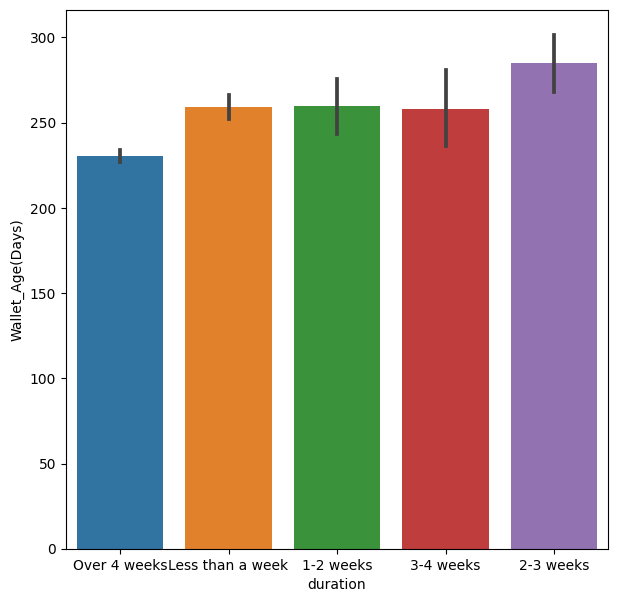

In [25]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, x='duration',y='Wallet_Age(Days)');

In [26]:
data.columns

Index(['address', 'balance', 'Days_held', 'Amount_Received(OP)',
       'Amount_Sold(OP)', 'percentage_spent', 'TDR', 'Wallet_Age(Days)',
       'From_Count', 'To_Count', 'Past_participant', 'duration',
       'no_transactions'],
      dtype='object')

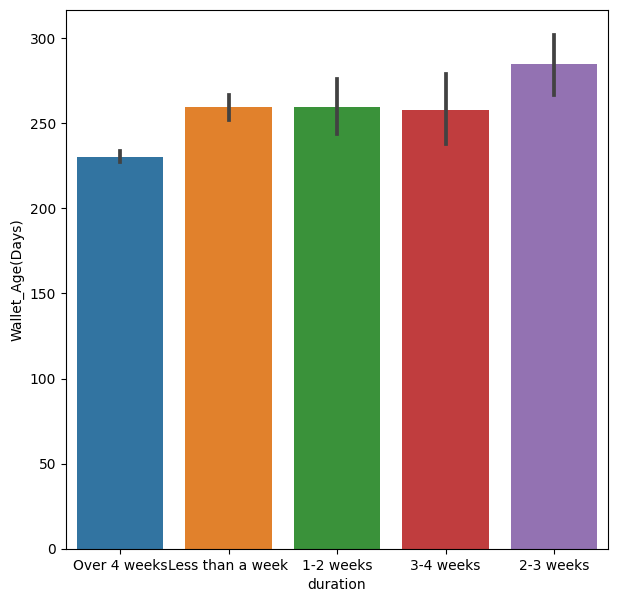

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, x='duration',y='Wallet_Age(Days)');

In [ ]:
data.columns